In [18]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
color = sns.color_palette()
%matplotlib inline
matplotlib.style.use('ggplot')

from collections import Counter
from IPython import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# my own module
from conf.configure import Configure
import kmeans_impute_missing_data as impute
import impute_missing_data
import data_utils

In [19]:
_, _, macros = data_utils.load_data()

In [20]:
macros.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,12449.019512,3.196788,322.143454,354.068975,110.122308,16.655067,15.062976,29.855581,...,690.0,6221.0,527.0,0.41,993.0,349902.577766,25.06859,63.03,22825.0,230615.059255
1,2010-01-02,76.1,12449.019512,3.196788,322.143454,354.068975,110.122308,16.655067,15.062976,29.855581,...,690.0,6221.0,527.0,0.41,993.0,349902.577766,25.06859,63.03,22825.0,230615.059255
2,2010-01-03,76.1,12449.019512,3.196788,322.143454,354.068975,110.122308,16.655067,15.062976,29.855581,...,690.0,6221.0,527.0,0.41,993.0,349902.577766,25.06859,63.03,22825.0,230615.059255
3,2010-01-04,76.1,12449.019512,3.196788,322.143454,354.068975,110.122308,16.655067,15.062976,29.905000,...,690.0,6221.0,527.0,0.41,993.0,349902.577766,25.06859,63.03,22825.0,230615.059255
4,2010-01-05,76.1,12449.019512,3.196788,322.143454,354.068975,110.122308,16.655067,15.062976,29.836000,...,690.0,6221.0,527.0,0.41,993.0,349902.577766,25.06859,63.03,22825.0,230615.059255


In [21]:
missing_df = macros.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df.missing_count > 0]
missing_df = missing_df.sort_values(by='missing_count', ascending=False)
total_count = macros.shape[0]
missing_df['missing_rate'] = 1.0 * missing_df['missing_count'] / total_count
missing_df.head()

,column_name,missing_count,missing_rate


In [22]:
num_columns = macros.select_dtypes(exclude=['object']).columns.values.tolist()
str_columns = macros.select_dtypes(include=['object']).columns.values.tolist()

print str_columns

['timestamp', 'child_on_acc_pre_school', 'modern_education_share', 'old_education_build_share']


先处理类别属性

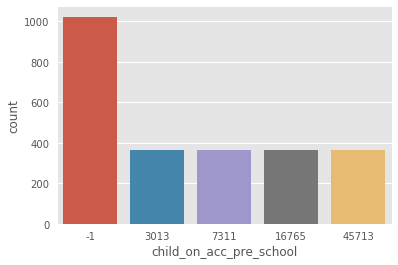

In [25]:
sns.countplot(macros.child_on_acc_pre_school)

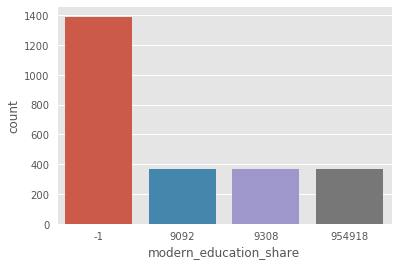

In [26]:
sns.countplot(macros.modern_education_share)

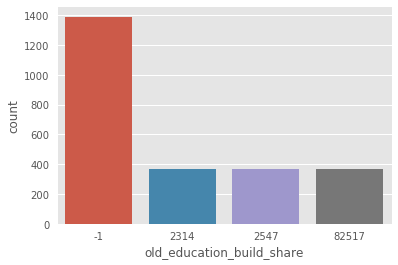

In [27]:
sns.countplot(macros.old_education_build_share)

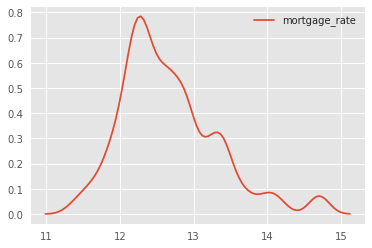

In [53]:
sns.kdeplot(macros.mortgage_rate)